In [1]:
import sys
!{sys.executable} -m pip install pytrends

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pytrends as pt
from pytrends.request import TrendReq

In [3]:
def pytrendshare(seach_language, time_zone_value, time_frame, key_word_list):
    # Create pytrends object
    pytrends = TrendReq(hl = seach_language, tz = time_zone_value)
    # Payload for the keyword
    pytrends.build_payload(kw_list = key_word_list, timeframe = time_frame)
    # Create Dataframe
    df = pytrends.interest_over_time()
    # drop unessessary column
    df = df.drop(columns='isPartial')
    # graph the data
    fig, ax = plt.subplots(len(key_word_list), 1, figsize=(9, 9), sharey = True)
    fig.suptitle('Percentage Share over the period \"'+ str(time_frame) +'\" of Google Trend Keyword Searches', fontsize = 14, y=0.94)
    fig.subplots_adjust(hspace=0.4)
    for i in range(0, len(key_word_list)):
        df.plot(y=key_word_list[i], ax=ax[i], linewidth = '2.5')
        ax[i].set_title(key_word_list[i])
        ax[i].set_ylabel('% Share')
        ax[i].set(xlabel=None)
        ax[i].get_legend().remove()
        ax[i].grid(axis = 'y', linestyle = '--')
        i+=1
 

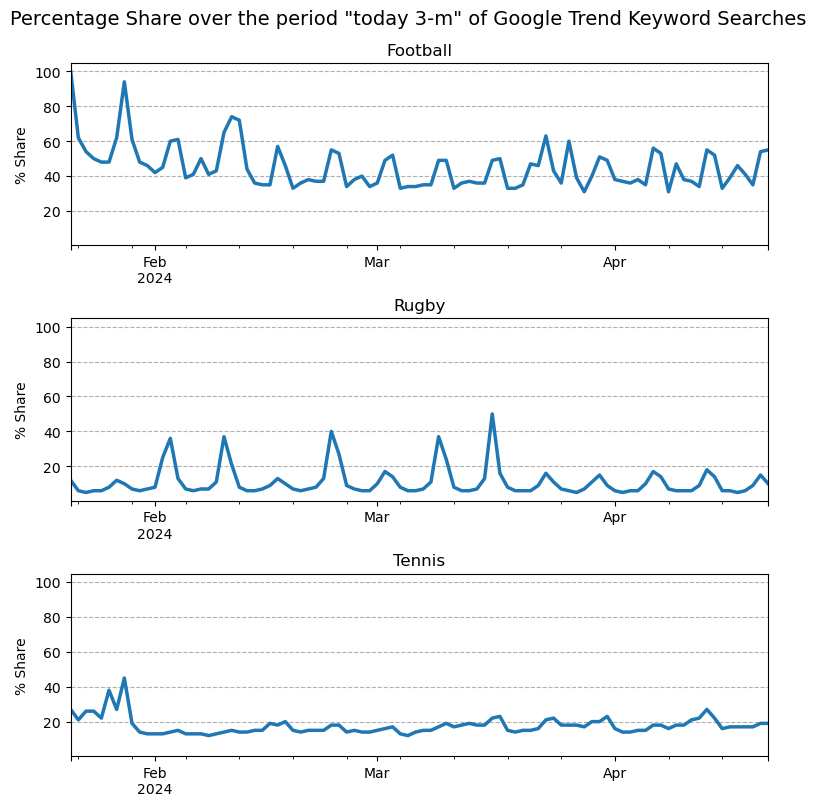

In [4]:
pytrendshare('en-UK', '60', 'today 3-m',  ['Football', 'Rugby', 'Tennis'])